In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo',start, end)

In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-10-22 to 2019-10-18
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


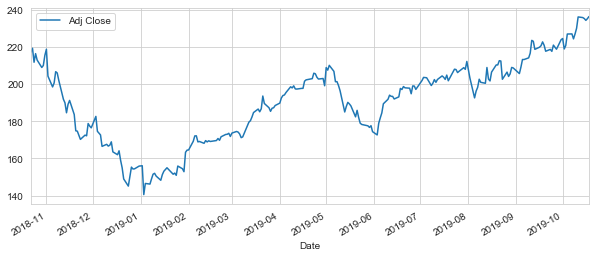

In [9]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

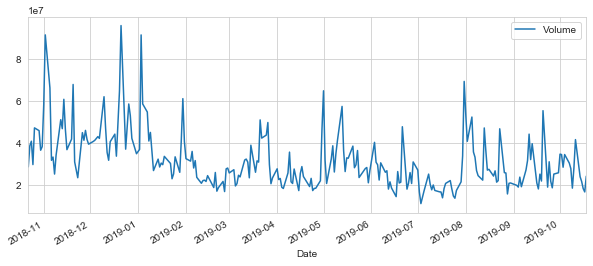

In [10]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
## Find Moving Average
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA{}'.format(ma)
    AAPL[column_name]=AAPL['Adj Close'].rolling(window = ma).mean()

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50
Date,,,,,,,,,
2018-10-22,223.360001,218.940002,219.789993,220.649994,28792100.0,217.278320,NaN,NaN,NaN
2018-10-23,223.250000,214.699997,215.830002,222.729996,38767800.0,219.326538,NaN,NaN,NaN
2018-10-24,224.229996,214.539993,222.600006,215.089996,40925500.0,211.803284,NaN,NaN,NaN
2018-10-25,221.380005,216.750000,217.710007,219.800003,29855800.0,216.441330,NaN,NaN,NaN
2018-10-26,220.190002,212.669998,215.899994,216.300003,47258400.0,212.994797,NaN,NaN,NaN


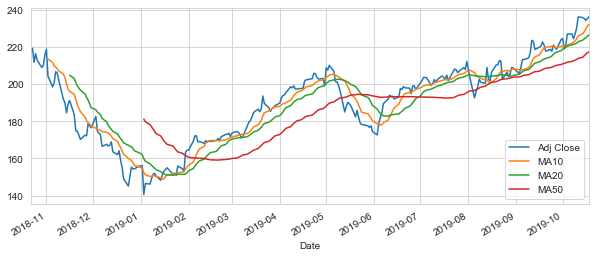

In [13]:
AAPL[['Adj Close', 'MA10','MA20','MA50']].plot(subplots=False, figsize=(10,4))

In [14]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

In [15]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50,Daily Return
Date,,,,,,,,,,
2018-10-22,223.360001,218.940002,219.789993,220.649994,28792100.0,217.278320,NaN,NaN,NaN,NaN
2018-10-23,223.250000,214.699997,215.830002,222.729996,38767800.0,219.326538,NaN,NaN,NaN,0.009427
2018-10-24,224.229996,214.539993,222.600006,215.089996,40925500.0,211.803284,NaN,NaN,NaN,-0.034302
2018-10-25,221.380005,216.750000,217.710007,219.800003,29855800.0,216.441330,NaN,NaN,NaN,0.021898
2018-10-26,220.190002,212.669998,215.899994,216.300003,47258400.0,212.994797,NaN,NaN,NaN,-0.015924


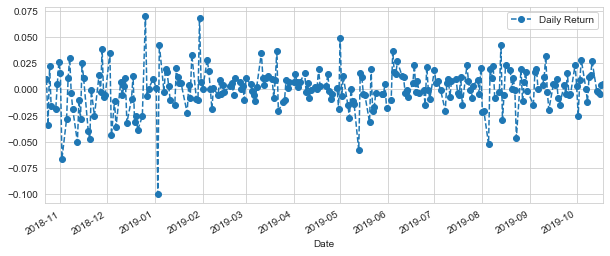

In [16]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')

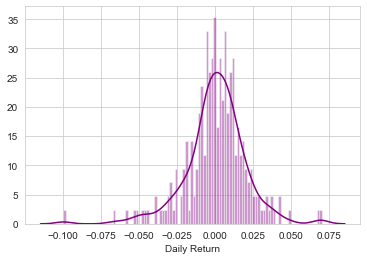

In [17]:
## kde plot and histogram
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

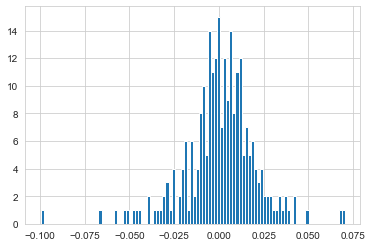

In [18]:
## Plot only histogram
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start, end)['Adj Close']

In [20]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-22,217.278320,1789.300049,1101.160034,107.933945
2018-10-23,219.326538,1768.699951,1103.689941,106.427612
2018-10-24,211.803284,1664.199951,1050.709961,100.737038
2018-10-25,216.441330,1782.170044,1095.569946,106.624535
2018-10-26,212.994797,1642.810059,1071.469971,105.305260


In [21]:
tech_rets=closing_df.pct_change()

In [22]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-22,NaN,NaN,NaN,NaN
2018-10-23,0.009427,-0.011513,0.002297,-0.013956
2018-10-24,-0.034302,-0.059083,-0.048003,-0.053469
2018-10-25,0.021898,0.070887,0.042695,0.058444
2018-10-26,-0.015924,-0.078197,-0.021998,-0.012373


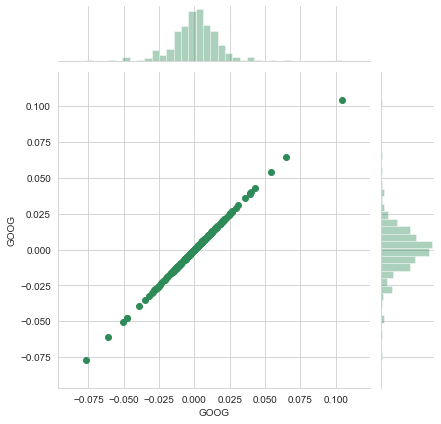

In [23]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter',color='seagreen')

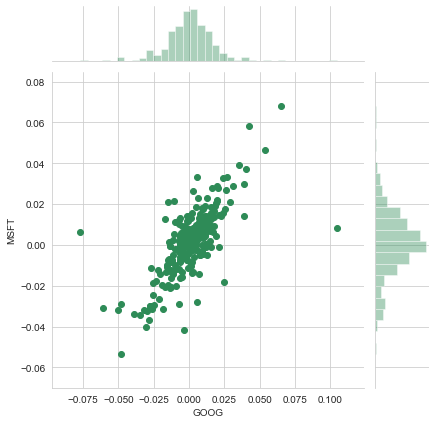

In [24]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter',color='seagreen')

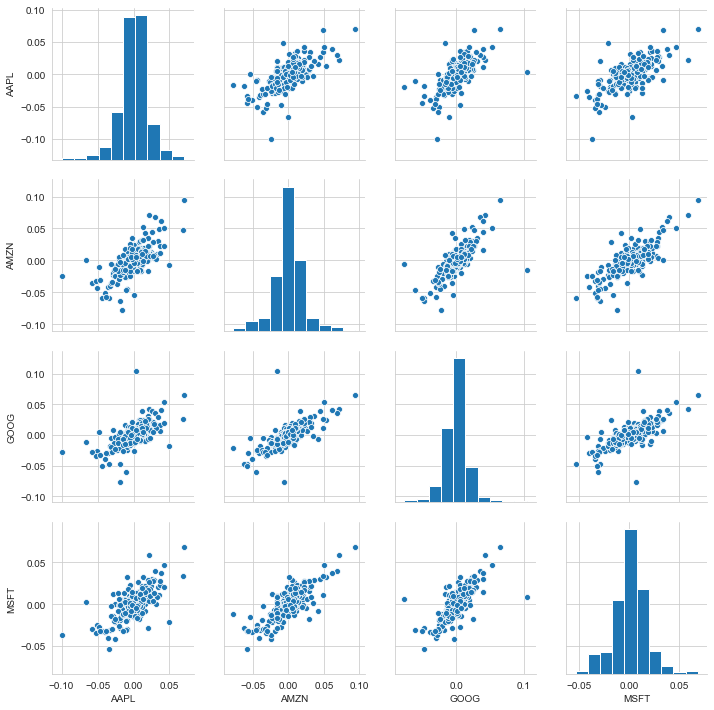

In [25]:
sns.pairplot(tech_rets.dropna())

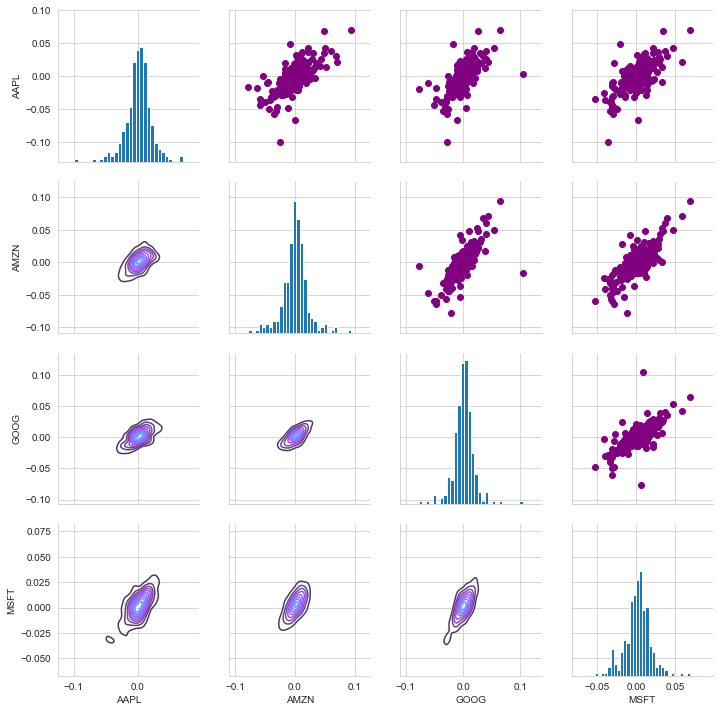

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

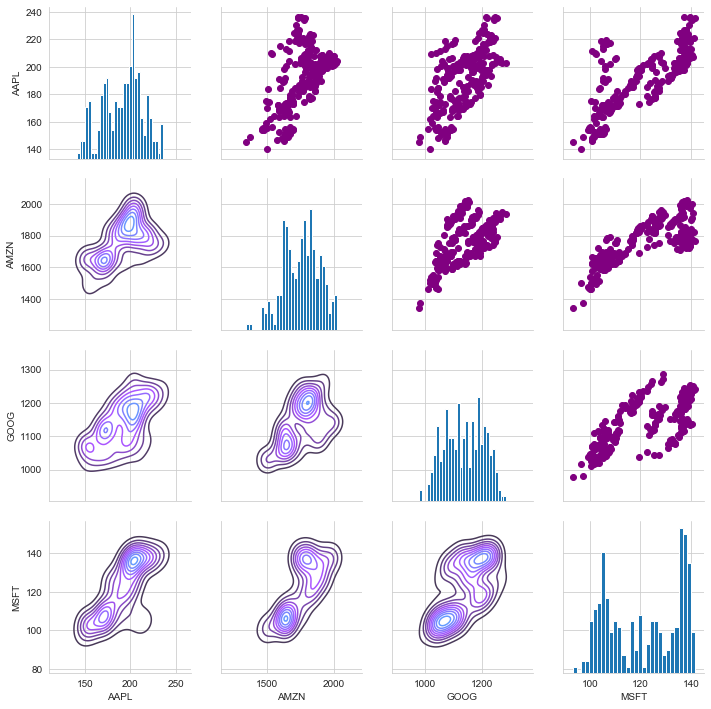

In [29]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

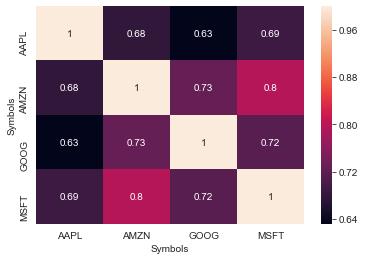

In [30]:
sns.heatmap(tech_rets.corr(), annot=True)

In [31]:
rets = tech_rets.dropna()

In [32]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-23,0.009427,-0.011513,0.002297,-0.013956
2018-10-24,-0.034302,-0.059083,-0.048003,-0.053469
2018-10-25,0.021898,0.070887,0.042695,0.058444
2018-10-26,-0.015924,-0.078197,-0.021998,-0.012373
2018-10-29,-0.018770,-0.063264,-0.047962,-0.029076


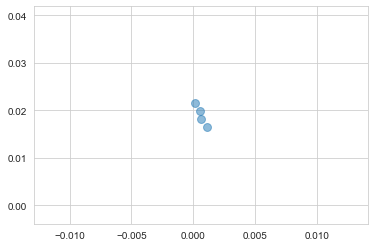

In [35]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5, s=np.pi*20)

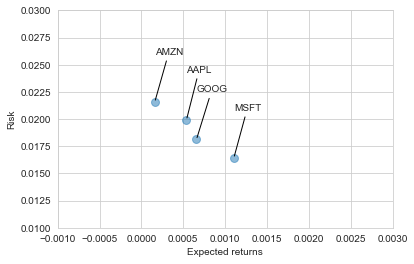

In [54]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5, s=np.pi*20)
plt.ylim([0.01,0.03])
plt.xlim([-0.001,0.003])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords='offset points', ha = 'left', va='center',
                arrowprops=dict(color='black',arrowstyle='-', connectionstyle='arc3'))

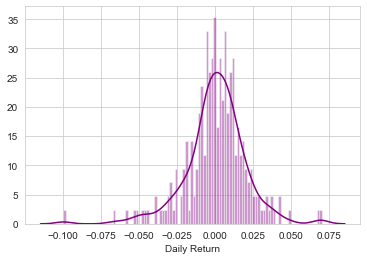

In [56]:
# Find Value at Risk In One Year
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [57]:
rets['AAPL'].quantile(0.05)

-0.031706554147198696

95%の確率で日々の変動率が３.１％を下回らない

In [98]:
days = 365
dt = 1/days
# Mean Daily Price Change
mu = rets.mean()['GOOG']
# Volatility
sigma = rets.std()['GOOG']

In [99]:
# Monte Carlo

def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [100]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-22,1112.229980,1091.000000,1103.060059,1101.160034,1514200,1101.160034
2018-10-23,1107.890015,1070.000000,1080.890015,1103.689941,1848700,1103.689941
2018-10-24,1106.119995,1048.739990,1104.250000,1050.709961,1982400,1050.709961
2018-10-25,1110.979980,1069.550049,1071.790039,1095.569946,2545800,1095.569946
2018-10-26,1106.530029,1034.089966,1037.030029,1071.469971,4187600,1071.469971


Text(0.5, 1.0, 'Monte Carlo Analysis')

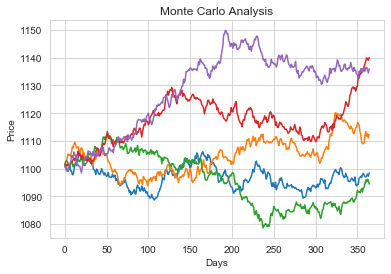

In [101]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [102]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1] 

(array([2., 0., 1., ..., 0., 2., 1.]),
 array([1036.31690864, 1036.98214315, 1037.64737766, ..., 1168.03334219,
        1168.6985767 , 1169.36381121]),
 <a list of 200 Patch objects>)

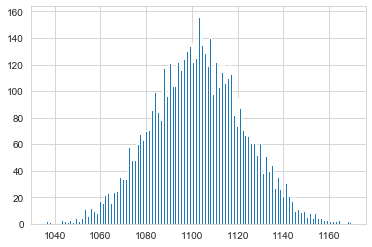

In [103]:
plt.hist(simulations, bins=200)

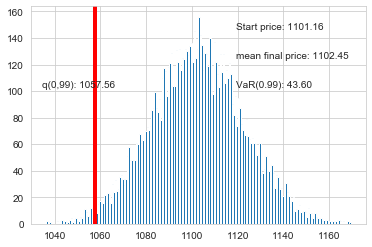

In [104]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

# Start Price
plt.figtext(0.6,0.8,s='Start price: {:0.2f}'.format(start_price))
# Mean Fianl Price
plt.figtext(0.6,0.7,'mean final price: {:0.2f}'.format(simulations.mean()))
# Value at Risk(CI:99%)
plt.figtext(0.6,0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
# 1 percentile
plt.figtext(0.15,0.6,'q(0,99): {:0.2f}'.format(q))

plt.axvline(x=q, linewidth=4, color='r')

１株1101ドルで買うと、99%の確率で損失が43.76ドル以内に収まる